In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("vgsales.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Analysing the Global Sales with respect to Time

In [7]:
df1 = df.groupby(['Year']).sum()['Global_Sales'].reset_index(name='Global Sales')
df1=df1[df1['Year']>=2000]

In [9]:
df1

,Year,Global Sales
20,2000.0,201.56
21,2001.0,331.47
22,2002.0,395.52
23,2003.0,357.85
24,2004.0,419.31
25,2005.0,459.94
26,2006.0,521.04
27,2007.0,611.13
28,2008.0,678.90
29,2009.0,667.30


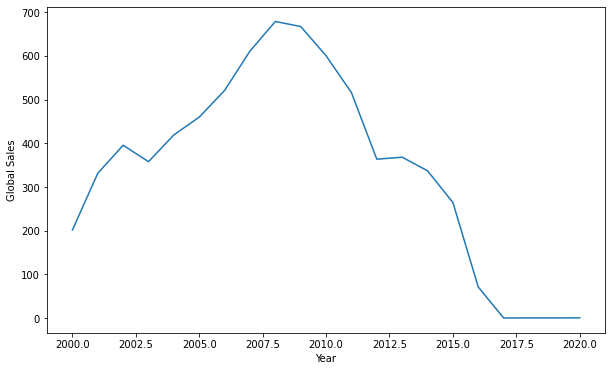

In [10]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Year',y='Global Sales',data=df1)
plt.show()

Finding Top 10 Publishers of Video Games

In [11]:
df2 = df.groupby(['Publisher']).sum()['Global_Sales'].reset_index(name='Global Sales')

In [12]:
df2=df2.sort_values(by='Global Sales',ascending=False).head(10)
print("Top 10 Publishers \n",df2,'\n')

Top 10 Publishers 
                         Publisher  Global Sales
359                      Nintendo       1786.56
138               Electronic Arts       1110.32
21                     Activision        727.46
456   Sony Computer Entertainment        607.50
525                       Ubisoft        474.72
494          Take-Two Interactive        399.54
488                           THQ        340.77
275  Konami Digital Entertainment        283.64
446                          Sega        272.99
347            Namco Bandai Games        254.09 



In [13]:

pieChart1 = px.pie(df2, values='Global Sales', names='Publisher', 
                  title='Top 10 Publishers of Video Games',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart1.show()

In [14]:
dfx = df.groupby(['Genre']).sum()['Global_Sales'].reset_index(name='Global Sales')

In [15]:
dfx=dfx.sort_values(by='Global Sales',ascending=False).head(10)
print(dfx)

           Genre  Global Sales
0         Action       1751.18
10        Sports       1330.93
8        Shooter       1037.37
7   Role-Playing        927.37
4       Platform        831.37
3           Misc        809.96
6         Racing        732.04
2       Fighting        448.91
9     Simulation        392.20
5         Puzzle        244.95


In [16]:
import plotly.express as px
pieChart = px.pie(dfx, values='Global Sales', names='Genre', 
                  title='Top 10 Categroies of Video Games',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

In [17]:
X=df.drop(['Global_Sales'],axis=1)
y=df['Global_Sales']

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178814 -0.401362 -0.379123 -0.267785    -0.332986   
Year          0.178814  1.000000 -0.091402  0.006014 -0.169316     0.041058   
NA_Sales     -0.401362 -0.091402  1.000000  0.767727  0.449787     0.634737   
EU_Sales     -0.379123  0.006014  0.767727  1.000000  0.435584     0.726385   
JP_Sales     -0.267785 -0.169316  0.449787  0.435584  1.000000     0.290186   
Other_Sales  -0.332986  0.041058  0.634737  0.726385  0.290186     1.000000   
Global_Sales -0.427407 -0.074735  0.941047  0.902836  0.611816     0.748331   

              Global_Sales  
Rank             -0.427407  
Year             -0.074735  
NA_Sales          0.941047  
EU_Sales          0.902836  
JP_Sales          0.611816  
Other_Sales       0.748331  
Global_Sales      1.000000   



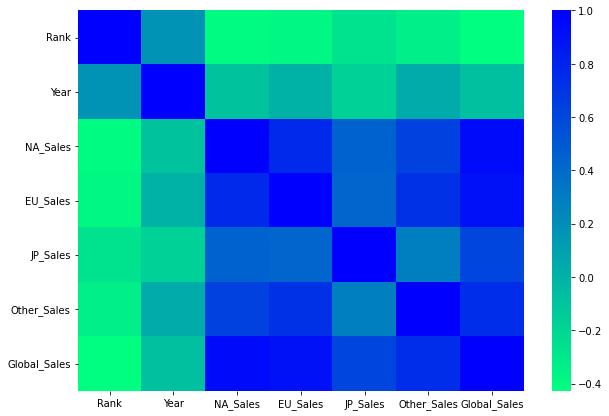

In [18]:
print(df.corr(),'\n')
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap="winter_r")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "O"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [21]:
categorical_cols

[]

In [22]:
numerical_cols

['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [23]:
X_train['Year'].dtype

dtype('float64')

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train)
X_train[numerical_cols] = imputer.transform(X_train[numerical_cols])
print(X_train.isnull().sum())

Rank           0
Year           0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


In [25]:
X_valid.isnull().sum()

Rank            0
Year           72
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

In [26]:
X_valid = imputer.transform(X_valid)


In [27]:
X_valid

array([[1.588e+03, 2.007e+03, 4.700e-01, 5.300e-01, 3.000e-02, 2.200e-01],
       [5.370e+03, 2.003e+03, 8.000e-02, 6.000e-02, 1.900e-01, 2.000e-02],
       [6.277e+03, 1.997e+03, 9.000e-02, 6.000e-02, 1.100e-01, 2.000e-02],
       ...,
       [4.004e+03, 1.996e+03, 0.000e+00, 0.000e+00, 5.000e-01, 0.000e+00],
       [7.261e+03, 2.009e+03, 2.000e-01, 0.000e+00, 0.000e+00, 2.000e-02],
       [8.153e+03, 1.998e+03, 1.000e-01, 7.000e-02, 0.000e+00, 1.000e-02]])

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
print(X_train)
print(X_valid)

[[ 1.46574518  0.96909383 -0.32725918 -0.28094534 -0.18444935 -0.24025906]
 [-0.50352225  0.79625381  0.03026501 -0.28094534 -0.24820813 -0.14172299]
 [ 1.21036167  0.27773374 -0.2779455  -0.28094534 -0.24820813 -0.24025906]
 ...
 [ 0.32954917  0.62341378 -0.32725918 -0.28094534  0.13434454 -0.24025906]
 [ 0.52843559 -0.06794631 -0.22863182 -0.26191114 -0.24820813 -0.19099102]
 [-1.15334298  0.27773374  0.17820605  0.1187729  -0.24820813  0.44949341]]
[[-1.39225686  0.10489372  0.25217658  0.72786736 -0.15256996  0.84363768]
 [-0.60379937 -0.58646637 -0.22863182 -0.16674013  0.35750026 -0.14172299]
 [-0.41471134 -1.62350651 -0.2163034  -0.16674013  0.10246515 -0.14172299]
 ...
 [-0.88857804 -1.79634653 -0.32725918 -0.28094534  1.34576132 -0.24025906]
 [-0.20957063  0.45057376 -0.08069077 -0.28094534 -0.24820813 -0.14172299]
 [-0.02360974 -1.45066649 -0.20397498 -0.14770593 -0.24820813 -0.19099102]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [29]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [30]:
ann=tf.keras.models.Sequential()

In [31]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [32]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [33]:
ann.add(tf.keras.layers.Dense(units=1))

In [34]:
# optimizer='adam' is used for  telling the tensorflow library to use Stochastic gradient descent

In [35]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [36]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
364/364 [==============================] - 2s 2ms/step - loss: 3.1020
Epoch 2/100
364/364 [==============================] - 1s 2ms/step - loss: 2.1417
Epoch 3/100
364/364 [==============================] - 1s 2ms/step - loss: 1.1660
Epoch 4/100
364/364 [==============================] - 1s 2ms/step - loss: 0.3980
Epoch 5/100
364/364 [==============================] - 1s 1ms/step - loss: 0.1053
Epoch 6/100
364/364 [==============================] - 1s 2ms/step - loss: 0.0293
Epoch 7/100
364/364 [==============================] - 1s 2ms/step - loss: 0.0149
Epoch 8/100
364/364 [==============================] - 1s 2ms/step - loss: 0.0101
Epoch 9/100
364/364 [==============================] - 1s 2ms/step - loss: 0.0076
Epoch 10/100
364/364 [==============================] - 1s 2ms/step - loss: 0.0078
Epoch 11/100
364/364 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 12/100
364/364 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 13/100


In [37]:
y_pred=ann.predict(X_valid)
y_pred


array([[1.2409303 ],
       [0.34135932],
       [0.2754375 ],
       ...,
       [0.51002616],
       [0.22317599],
       [0.17480454]], dtype=float32)

In [38]:
y_valid = np.array(y_valid)

In [39]:
np.concatenate((y_pred,y_valid.reshape(len(y_valid),1)),1)

array([[1.24093032, 1.25      ],
       [0.34135932, 0.34      ],
       [0.2754375 , 0.27      ],
       ...,
       [0.51002616, 0.5       ],
       [0.22317599, 0.22      ],
       [0.17480454, 0.18      ]])